In [31]:
from urllib.request import urlopen
url = 'http://www.google.com'
html = urlopen(url)
html.read()

b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="vB2yqWm35kDP0EzQ-aA5pw">(function(){var _g={kEI:\'35ROZvO5Fpy_0-kP_JeasA8\',kEXPI:\'0,3700295,1015,538735,2872,2891,11754,61296,6397,9708,230,107236,6642,49751,2,39761,6700,41945,57737,2,2,1,26632,8155,23351,22435,52238,20199,73178,3030,15816,1804,47082,1635,5259568,5916,2660,1512,5991809,2798625,41157,142,144,7442128,36,20539903,16673,43886,3,318,4,1281,3,2121778,2585,24111,23005240,12799,8408,8004,8661,28027,36870,1922,8581,2,6,2370,4832,1575,2866,5183,2442,3354,10054,5111,7968,213,390,5546,13259,1,9497,4562,11907,1270,2998,1698,8387,3487,7503,359,236,52,2956,3746,155,399,1291,69,5,720,4400,4547,4556,204,7533,7,4079,2513,1426,1114,767,200,539,361,1283,1449,207,121,546,2671,4,126,2878,707,409,2235,927,1,

# 5.2.1 requests 패키지를 사용하여 서버에 HTTP request 보내기

In [32]:
import requests

# 5.2.2 requests 실습 문제

<div class="alert alert-success">
    [문제]  
    
    
파이썬의 requests 모듈을 사용하여 구글 (‘http://www.google.com’)의 html 코드를 출력하세요
</div>

In [33]:
url = 'http://www.google.com'
r = requests.get(url)   # get 방식으로 가져오겠다는 의미
r
# r = requests.post(url)
# r = requests.put(url)
# r = requests.delete(url)

# 평문통신 문자열 (왔다<->갔다)
# Chrome : 개발자 도구를 잘 활용할 수 있음 (F12)

# url https://google.com/특정주소.?addr=경기도&addr2=하부주소&dfs   
# ?addr=경기도&addr2=하부주소&dfs   # ?의 뒷단 : 쿼리스트링(요청문자열)
# header : 편지봉투, 헤더
# body : 편지 본문

<Response [200]>

In [34]:
r.status_code
# 200 = 정상
# 404 = 서버 에러

200

In [35]:
r.text
# 문자열이기 때문에 r.text.문자열함수() 사용할 수 있다

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="rsZ8-HXRv7jlxRpwzhs9jg">(function(){var _g={kEI:\'8JROZpeWLojk2roPva634Ao\',kEXPI:\'0,18168,774940,2907165,676,361,507176,28848,2711,2872,2891,8348,34680,46357,107230,6648,49751,2,39761,6699,41949,57734,2,2,1,24626,2006,8155,23351,22435,9779,38677,3782,20198,44508,28671,3030,15816,1804,35268,961,10853,342,1291,5268145,1514,37,5991771,2798624,41158,286,7442129,34,16496194,2769771,1273939,14297,2375,43887,3,318,4,1281,3,2121778,2585,24111,23005240,6869,5930,8409,3321,13343,28027,36870,1923,8577,2,9,2370,6407,13846,15164,7968,213,391,5545,1981,9960,15378,9247,2788,4140,5129,4,4952,10991,359,237,2095,4657,155,399,1344,5,736,4400,4547,679,3877,3897,3839,8,730,2,5860,434,992,1113,78,602,4,284,539,361,1282,1450,2

-----
<div class="alert alert-warning">
[Tip] headers 인자에 User-Agent 정보를 추가로 입력
</div>

In [36]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36'}
r = requests.get(url, headers=headers)
r

<Response [200]>

----------

<div class="alert alert-success">
    [문제]  
    
    
파이썬의 requests 모듈을 사용하여 구글 메인 페이지에 표시된 이미지 (‘https://www.google.co.kr/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png’)를 출력하세요.
</div>

In [12]:
import requests
url = 'https://www.google.co.kr/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png'
# url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQt9F5ONV1X964H-j0pkQVquJ17QOfZVRHPTnPbmAPvtQ&s'
r = requests.get(url)
r.status_code

200

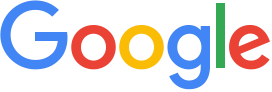

In [13]:
from PIL import Image   # PIL : Python Image Library
from io import BytesIO

Image.open(BytesIO(r.content))

-----
<div class="alert alert-warning">
[Tip] 이미지 저장하기
</div>

In [7]:
import requests   
url = 'https://www.google.co.kr/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png'
r = requests.get(url)  

In [8]:
# url에서 image 이름에 해당하는 부분('/'이후 가장 마지막) 추출
import os 
image_name = os.path.basename(url)  # basename : 경로의 마지막 요소 리턴(/기준 마지막 파일명)
image_name

'googlelogo_color_272x92dp.png'

In [9]:
# 이미지 저장을 위한 폴더 생성
os.getcwd()
image_folder = f"{os.getcwd()}/image"
if not os.path.isdir(image_folder):
    os.mkdir(image_folder)    

# 이미지 저장 경로 지정: image_folder/image_name
image_path = os.path.join(image_folder, image_name)

# 이미지 저장
image = open(image_path, 'wb') 
image.write(r.content) 
image.close() 

-----